# Initialisation

* establishing the list of available machines in the environment
* Creation of profiles operating in the environment
* Import of mitre attacks applicable in the environment

In [1]:
from cyberbattle.env.samples.little_network import get_little_environment_network, get_little_environment_profiles, get_machine_list
from cyberbattle.vulnerabilities.attacks import AttackSet

num_client = 5

machines = get_machine_list(num_client)
profiles = get_little_environment_profiles(num_client)
network = get_little_environment_network(num_client)

attacks = AttackSet(machines, profiles, max_per_outcomes=1)

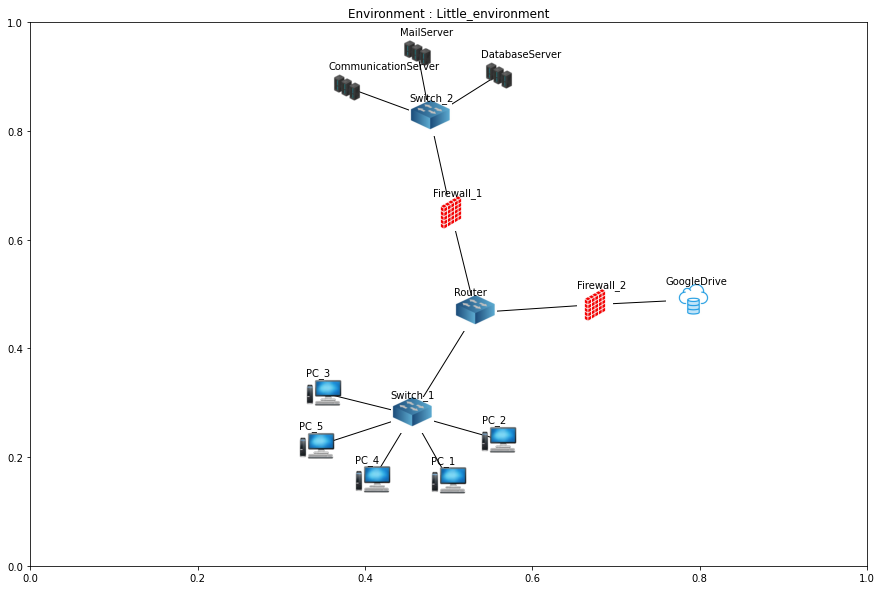

In [2]:
network.display(annotations=True)

In [3]:
network.get_services()

['HTTPS', 'sudo']

In [4]:
network.get_available_datasources()

['User Account',
 'Cloud Storage',
 'Driver',
 'Script',
 'Logon Session',
 'Cloud Service',
 'Process',
 'File']

In [5]:
network.get_machine_services('MailServer')

{'Dev': {'HTTPS': ['User Account']},
 'DSI': {'HTTPS': ['Cloud Storage', 'Cloud Service', 'User Account']}}

In [6]:
network.get_path('PC_1','GoogleDrive')

In [7]:
profiles.get_profiles()

In [8]:
attacks.get_attack_count()

5

In [9]:
for machine in network.get_machine_list():

    outcomes = machine.get_outcomes()

    if outcomes:
        
        print('\n')
        print(machine.get_instance_name(),' :')
            
        for outcome in machine.get_outcomes():

            print(outcome.get_phase_name(), ' :', outcome.get())



PC_4  :
discovery  : (['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5'], False)


PC_5  :
credential-access  : ([<cyberbattle.env.utils.flow.Credential object at 0x000001A713385D30>], False)


DatabaseServer  :
collection  : ('Confidential document', True)


MailServer  :
discovery  : (['DatabaseServer', 'CommunicationServer', 'GoogleDrive'], False)


GoogleDrive  :
credential-access  : ([<cyberbattle.env.utils.flow.Credential object at 0x000001A71338E340>], False)


In [10]:
attacks.get_attacks_by_machines_string()

{'PC_1': {},
 'PC_2': {},
 'PC_3': {'System Owner/User Discovery': {'data sources triggered': 'Process',
   'phase name': 'discovery',
   'Type': 'Local'}},
 'PC_4': {},
 'PC_5': {'Password Guessing': {'data sources triggered': 'User Account',
   'phase name': 'credential-access',
   'Type': 'Remote'}},
 'Switch_1': {},
 'Switch_2': {},
 'Router': {},
 'DatabaseServer': {'Browser Session Hijacking': {'data sources triggered': 'Logon Session',
   'phase name': 'collection',
   'Type': 'Local'}},
 'MailServer': {'Network Service Scanning': {'data sources triggered': 'Cloud Service',
   'phase name': 'discovery',
   'Type': 'Local'}},
 'CommunicationServer': {},
 'GoogleDrive': {'Forge Web Credentials': {'data sources triggered': 'Logon Session',
   'phase name': 'credential-access',
   'Type': 'Remote'}},
 'Firewall_1': {},
 'Firewall_2': {}}

# Run environment steps

In [11]:
from cyberbattle.agents.battle_environment import CyberBattleEnv
from cyberbattle.env.samples.little_network import DSI, Dev

profiles = {
    DSI(num_client): 1,
    Dev(num_client): num_client - 1
}

env = CyberBattleEnv(network, profiles)

for _ in range(5):
    matrix = env.step(display_Siem=True)

env.reset()




Traffic during step 0


,Activity,Source ip adress,Target ip adress,Data source triggered,Port,Error
0,yes,PC_2,PC_2,User Account: User Account Modification,sudo,no error
1,yes,PC_3,PC_3,Script: Script Execution,sudo,no error
2,no,_,_,_,_,_
3,no,_,_,_,_,_
4,yes,PC_5,PC_1,Script: Script Execution,sudo,no error
5,no,_,_,_,_,_




Traffic during step 1


,Activity,Source ip adress,Target ip adress,Data source triggered,Port,Error
0,no,_,_,_,_,_
1,yes,PC_5,PC_5,User Account: User Account Authentification,sudo,no error
2,no,_,_,_,_,_
3,yes,PC_2,PC_2,Process: Process Termination,sudo,no error
4,yes,PC_4,PC_4,Script: Script Execution,sudo,no error
5,yes,PC_1,GoogleDrive,Cloud Storage: Cloud Storage Enumeration,HTTPS,no error




Traffic during step 2


,Activity,Source ip adress,Target ip adress,Data source triggered,Port,Error
0,no,_,_,_,_,_
1,no,_,_,_,_,_
2,no,_,_,_,_,_
3,no,_,_,_,_,_
4,yes,PC_4,PC_4,User Account: User Account Metadata,sudo,no error
5,yes,GoogleDrive,PC_2,Script: Script Execution,sudo,no error




Traffic during step 3


,Activity,Source ip adress,Target ip adress,Data source triggered,Port,Error
0,yes,PC_3,PC_3,User Account: User Account Creation,sudo,no error
1,yes,PC_5,PC_5,Process: Process Termination,sudo,no error
2,no,_,_,_,_,_
3,no,_,_,_,_,_
4,yes,PC_2,PC_2,User Account: User Account Metadata,sudo,no error
5,yes,PC_4,PC_4,File: File Metadata,sudo,no error




Traffic during step 4


,Activity,Source ip adress,Target ip adress,Data source triggered,Port,Error
0,yes,PC_5,PC_5,File: File Creation,sudo,no error
1,yes,PC_3,PC_3,Script: Script Execution,sudo,no error
2,no,_,_,_,_,_
3,no,_,_,_,_,_
4,no,_,_,_,_,_
5,yes,PC_4,PC_4,File: File Creation,sudo,no error


In [12]:
env = CyberBattleEnv(network, profiles)

In [13]:
for _ in range(10000):
    matrix = env.step()

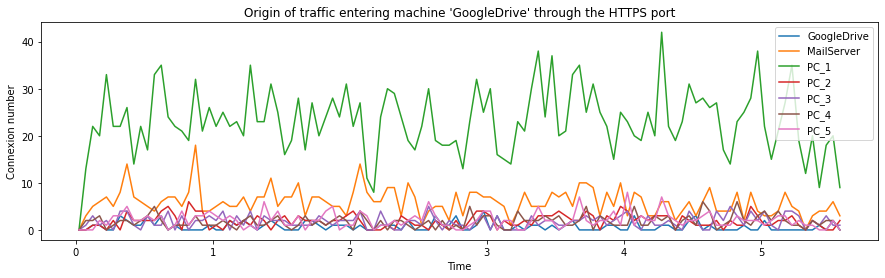

In [14]:
env.display_history('GoogleDrive', 'HTTPS')

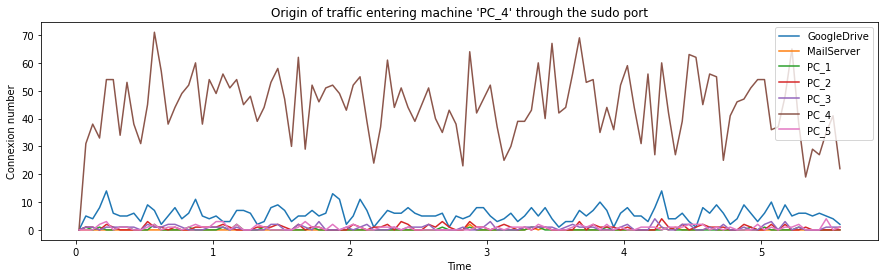

In [15]:
env.display_history('PC_4', 'sudo')